In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Placement_Prediction-main/college_placement_prediction.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,stream,degree_percentage,internship,quant_prowess,verbal_prowess,hostel,backlogs,projects,hackathons,college_tier,status
0,M,67.00,Others,91.00,Others,Electronics And Communication,58.00,No,55.0,58.80,1,1,2,5,3,Placed
1,M,79.33,Central,78.33,Others,Computer Science,77.48,Yes,86.5,66.28,1,1,2,1,2,Placed
2,M,65.00,Central,68.00,Central,Information Technology,64.00,No,75.0,57.80,0,0,3,4,2,Placed
3,M,56.00,Central,52.00,Central,Information Technology,52.00,No,66.0,59.43,0,1,8,0,2,Not Placed
4,M,85.80,Central,73.60,Central,Mechanical,73.30,No,96.8,55.50,1,0,1,1,3,Placed


In [ ]:
# relationship
corr_df = df.drop(['hostel', 'stream', 'internship' ,'backlogs', 'projects', 'hackathons', 'college_tier'], axis = 1)
corr = corr_df.corr()
corr

<ipython-input-5-9ec01eb24dc1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_df.corr()


,ssc_percentage,hsc_percentage,degree_percentage,quant_prowess,verbal_prowess
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364
quant_prowess,0.261993,0.245113,0.224470,1.000000,0.218055
verbal_prowess,0.388478,0.354823,0.402364,0.218055,1.000000


In [ ]:
corr_df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,quant_prowess,verbal_prowess,status
0,M,67.00,Others,91.00,Others,58.00,55.0,58.80,Placed
1,M,79.33,Central,78.33,Others,77.48,86.5,66.28,Placed
2,M,65.00,Central,68.00,Central,64.00,75.0,57.80,Placed
3,M,56.00,Central,52.00,Central,52.00,66.0,59.43,Not Placed
4,M,85.80,Central,73.60,Central,73.30,96.8,55.50,Placed
...,...,...,...,...,...,...,...,...,...
1930,M,80.60,Others,82.00,Others,77.60,91.0,74.49,Placed
1931,M,58.00,Others,60.00,Others,72.00,74.0,53.62,Placed
1932,M,67.00,Others,67.00,Others,73.00,59.0,69.72,Placed
1933,F,74.00,Others,66.00,Others,58.00,70.0,60.23,Placed


<Axes: >

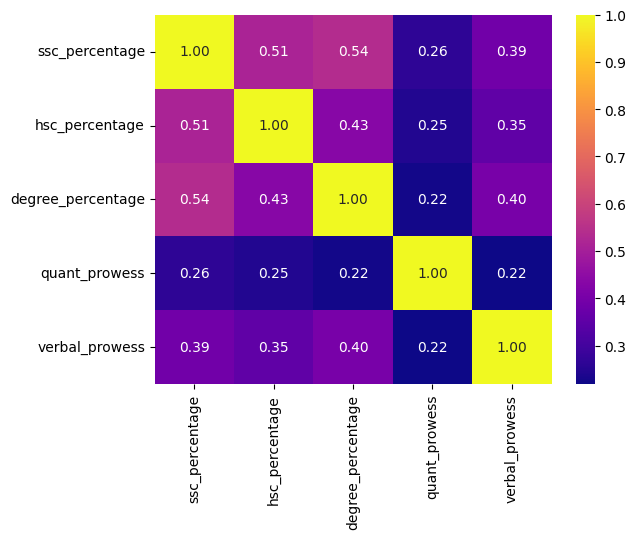

In [ ]:
import seaborn as sns
sns.heatmap(corr,cmap='plasma',annot=True,fmt=".2f")

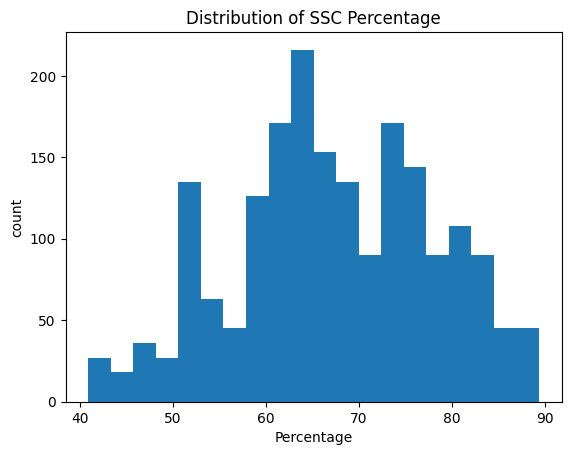

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['ssc_percentage'],bins=20)
plt.title("Distribution of SSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

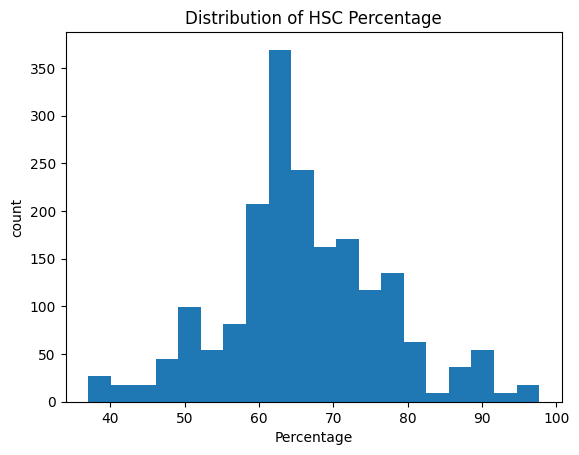

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['hsc_percentage'],bins=20)
plt.title("Distribution of HSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

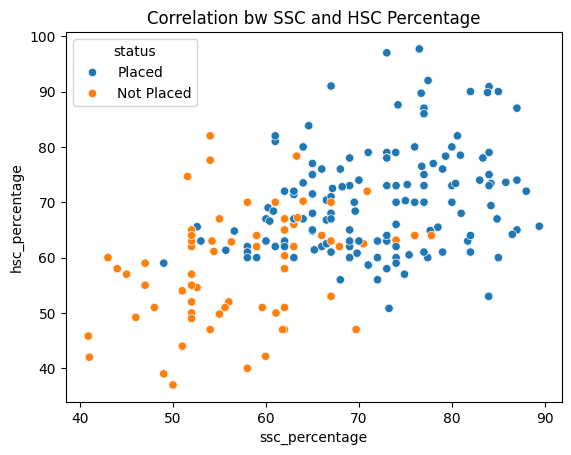

In [ ]:
sns.scatterplot(x='ssc_percentage',y='hsc_percentage',data=df,hue='status')
plt.title("Correlation bw SSC and HSC Percentage")
plt.show()

In [ ]:
df = pd.get_dummies(corr_df,columns=['gender', 'ssc_board', 'hsc_board', 'status'],drop_first=True)
df

,ssc_percentage,hsc_percentage,degree_percentage,quant_prowess,verbal_prowess,gender_M,ssc_board_Others,hsc_board_Others,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1930,80.60,82.00,77.60,91.0,74.49,1,1,1,1
1931,58.00,60.00,72.00,74.0,53.62,1,1,1,1
1932,67.00,67.00,73.00,59.0,69.72,1,1,1,1
1933,74.00,66.00,58.00,70.0,60.23,0,1,1,1


In [ ]:
x = df.drop('status_Placed',axis=1)
y = df['status_Placed']

In [ ]:
print(x.shape,'\n\n',y.shape)

(1935, 8) 

 (1935,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(X_train.shape,'\n\n',X_test.shape)

(1548, 8) 

 (387, 8)


In [ ]:
X_test

,ssc_percentage,hsc_percentage,degree_percentage,quant_prowess,verbal_prowess,gender_M,ssc_board_Others,hsc_board_Others
1289,62.00,58.00,53.00,89.00,60.22,1,0,1
1291,79.33,78.33,77.48,86.50,66.28,1,0,1
354,77.00,70.00,59.00,58.00,54.43,1,0,0
781,47.00,59.00,64.00,78.00,61.58,0,0,0
1550,76.00,64.00,72.00,58.00,66.53,0,0,0
...,...,...,...,...,...,...,...,...
346,74.90,57.00,62.00,80.00,60.78,0,1,1
1475,88.00,72.00,78.00,82.00,71.43,0,0,0
524,58.00,62.00,64.00,53.88,54.97,1,0,0
1399,52.00,63.00,65.00,86.00,56.09,1,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8630490956072352


In [ ]:
import pickle
pickle.dump(lg,open('placement.pkl','wb'))

In [ ]:
%%writefile style.css
/* style.css */
body {
    background-color: #f0f2f6;
    font-family: Arial, sans-serif;
}

.widget.stButton>button {
    background-color: #4CAF50;
    color: white;
    padding: 10px 20px;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    font-size: 16px;
    margin: 4px 2px;
    transition-duration: 0.4s;
    cursor: pointer;
}

.widget.stButton>button:hover {
    background-color: #45a049;
}

Writing style.css


In [ ]:
%%writefile app.py
import numpy as np
import pandas as pd
from PIL import Image
import streamlit as st
import pickle

# Load CSS for styling
def local_css(file_name):
    with open(file_name) as f:
        st.markdown(f'<style>{f.read()}</style>', unsafe_allow_html=True)

local_css("style.css")

# web app
st.title("Job Placement Prediction Model")

st.write('On entering the following Information, we will predict whether you will get placed or not')

# Inputs
name = st.text_input("Enter your name", "")
age = st.slider("Select your Age", 0, 100, 25)

gender_input = st.selectbox("Select your gender", ["Female", "Male"])
gender_M = 0 if gender_input == "Female" else 1

ssc_percentage = st.text_input("Enter your 10th Class Percentage", "")
SSC_board_input = st.selectbox("Select your SSC Board", ["Central", "Other"])
ssc_board_Others = 0 if SSC_board_input == "Central" else 1

hsc_percentage = st.text_input("Enter your 12th Class Percentage", "")
HSC_board_input = st.selectbox("Select your HSC Board", ["Central Board", "Other Board"])
hsc_board_Others = 0 if HSC_board_input == "Central Board" else 1

options = ['Computer Science', 'Electronics and Communication', 'Information Technology', 'Mechanical', 'Civil', 'Electrical']
selected_option = st.selectbox('Select your Branch of Study for Engineering', options)

degree_percentage = st.text_input("Enter your Engineering Percentage", "")
quant_prowess = st.slider("Rate your Quantitative Ability (1-100)", 1, 100, 25)
verbal_prowess = st.slider("Rate your Verbal Ability (1-100)", 1, 100, 25)
internships = st.text_input("Number of internships", "")
backlogs = st.text_input("Number of backlogs", "")
projects = st.text_input("Number of projects", "")
hackathons = st.text_input("Number of hackathons participated", "")
college_tier = st.selectbox("Select your College Tier", [1, 2, 3])

# Load model
with open('placement.pkl', 'rb') as f:
    model = pickle.load(f)

# Submit button
if st.button("Submit"):
    # Make prediction
    predictions = model.predict([[float(ssc_percentage), float(hsc_percentage), float(degree_percentage), float(quant_prowess), float(verbal_prowess), int(gender_M), int(ssc_board_Others), int(hsc_board_Others)]])
    result = "Congratulations! You will be placed!" if predictions == 1 else "Sorry, you will not be placed. Keep working harder!"

    # Display result
    st.markdown(f"<h2 style='text-align: center; color: {'green' if predictions == 1 else 'red'};'>{result}</h2>", unsafe_allow_html=True)


Writing app.py


In [ ]:
!pip install Streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
import requests

def get_public_ip():
    response = requests.get('https://api.ipify.org')
    return response.text

public_ip = get_public_ip()
print(f"Public IP Address: {public_ip}")

Public IP Address: 34.80.150.83


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.150.83:8501

npx: installed 22 in 8.265s
your url is: https://calm-symbols-refuse.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
